In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
from utils import play
from qlearner import QPlayer, QStateAction
from tic_env import OptimalPlayer
import random
from collections import defaultdict
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import wandb


# Fix seed for reproducibility
random.seed(0)
np.random.seed(0)

In [45]:
def plot_average_rewards(player_stats, labels, log_every=250, save_path=None):
        
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    game_ids = list(range(0, len(player_stats[0]['reward'])*log_every, log_every))
    for i, player in enumerate(player_stats):
        label = labels[i]
        ax.plot(game_ids, player['reward'], label=label)
    
    ax.set_title(f'Average reward per {log_every} games', fontsize=20, fontweight='bold')
    ax.set_xlabel('Game', fontsize=16)
    ax.set_ylabel('Reward', fontsize=16)
    ax.set_xlim([0, len(game_ids)*log_every])
    ax.legend(loc='lower right')
    ax.grid()

    plt.show()
    
    if save_path is not None: fig.savefig(save_path, format='pdf')
    

In [55]:
def plot_rewards_and_losses(player_stats, labels, log_every=250, save_path=None):
        
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    game_ids = list(range(0, len(player_stats[0]['reward'])*log_every, log_every))
    for i, player in enumerate(player_stats):
        label = labels[i]
        axes[0].plot(game_ids, player['reward'], label=label)
        axes[1].plot(game_ids, player['loss'], label=label)
    
    axes[0].set_title(f'Average reward per {log_every} games', fontsize=20, fontweight='bold')
    axes[0].set_xlabel('Game', fontsize=16)
    axes[0].set_ylabel('Reward', fontsize=16)
    axes[0].set_xlim([0, len(game_ids)*log_every])
    axes[0].legend(loc='lower right')
    axes[0].grid()
    
    axes[1].set_title(f'Average loss per {log_every} games', fontsize=20, fontweight='bold')
    axes[1].set_xlabel('Game', fontsize=16)
    axes[1].set_ylabel('Loss', fontsize=16)
    axes[1].set_xlim([0, len(game_ids)*log_every])
    axes[1].legend(loc='lower right')
    axes[1].grid()

    plt.show()
    
    if save_path is not None: fig.savefig(save_path, format='pdf')
    

In [93]:
def plot_m_values(player_stats, labels, test_every=250, save_path=None):
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    game_ids = list(range(0, len(player_stats[0]['m_opt'])*test_every, test_every))
    for i, player in enumerate(player_stats):
        label = labels[i]
        axes[0].plot(game_ids, player["m_opt"], label=label)
        axes[1].plot(game_ids, player["m_rand"], label=label)

        
    axes[0].set_title(f'M_opt per {test_every} games', fontsize=20, fontweight='bold')
    axes[0].set_xlabel('Game', fontsize=16)
    axes[0].set_ylabel('M_opt', fontsize=16)
    axes[0].set_xlim([0, len(game_ids)*test_every])
    axes[0].legend(loc='lower right')
    axes[0].grid()
    
    axes[1].set_title(f'M_rand per {test_every} games', fontsize=20, fontweight='bold')
    axes[1].set_xlabel('Game', fontsize=16)
    axes[1].set_ylabel('M_rand', fontsize=16)
    axes[1].set_xlim([0, len(game_ids)*test_every])
    axes[1].legend(loc='lower right')
    axes[1].grid()

    plt.show()
    
    if save_path is not None: fig.savefig(save_path, format='pdf')
    

In [64]:
def fetch_from_wandb(id_list):
    api = wandb.Api()

    player_stats = []

    for run_id in id_list:
        run = api.run(f"mismayil/ann-project/{run_id}")
        history = run.scan_history()

        avg_reward, avg_loss, m_opt, m_rand = [], [], [], []
        for row in history:
            reward = row.get('avg_reward')
            if reward is not None: avg_reward.append(reward)
                
            loss = row.get('avg_loss')
            if loss is not None: avg_loss.append(loss)
                
            opt = row.get('m_opt')
            if opt is not None: m_opt.append(opt)

            rand = row.get('m_rand')
            if rand is not None: m_rand.append(rand)

        player_stats.append({
            'reward': avg_reward,
            'loss': avg_loss,
            'm_opt': m_opt,
            'm_rand': m_rand
        })
        
    return player_stats

### Q7

In [52]:
ids = {
    'eps_001' : '1yo9g88n',
    'eps_01' : '12pprkbq',
    'eps_02' : 'aqvmkmak',
    'eps_05' : '3vav57cm',    
}

player_stats = fetch_from_wandb(ids.values())

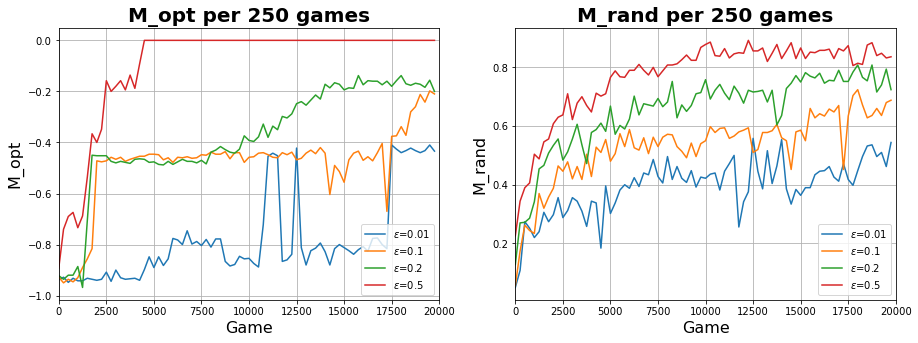

In [53]:
epsilons = [0.01, 0.1, 0.2, 0.5]
labels = [f'$\epsilon$={eps}' for eps in epsilons]

plot_m_values(player_stats, labels=labels, save_path='artifacts/fig_Q7.pdf')

### Q11

In [74]:
ids = {
    'eps_0001' : '2142xrqq',
    'eps_001' : '1tspnb9j',
    'eps_01' : 'azunen0m',
    'eps_02' : '2rz78cbz',    
}

player_stats = fetch_from_wandb(ids.values())

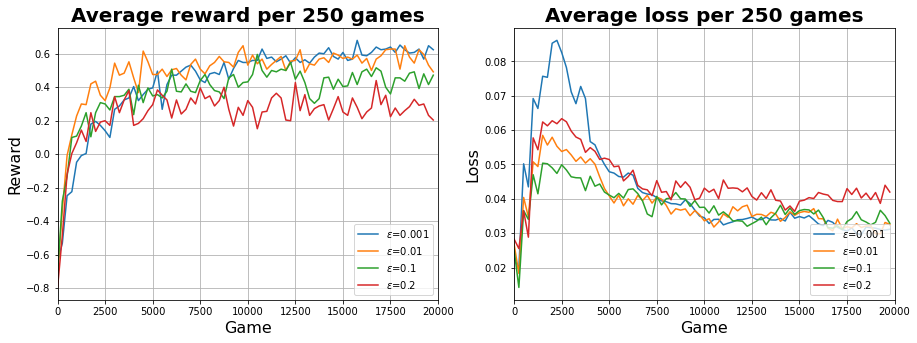

In [75]:
epsilons = [0.001, 0.01, 0.1, 0.2]
labels = [f'$\epsilon$={eps}' for eps in epsilons]

plot_rewards_and_losses(player_stats, labels=labels, save_path='artifacts/fig_Q11.pdf')

### Q12

In [76]:
ids = {
    'eps_0001' : '2142xrqq',
    'eps_001' : '1ypp4uzf',
    'eps_01' : '12fdqiuq',
    'eps_02' : '3pe1bm88',    
}

player_stats = fetch_from_wandb(ids.values())

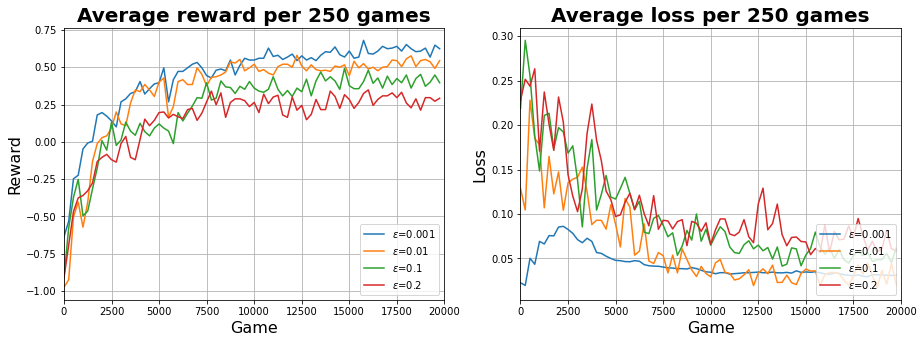

In [77]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_rewards_and_losses(player_stats, labels=labels, save_path='artifacts/fig_Q12.pdf')

### Q13

In [84]:
ids = {
    'n_star_1' : '8tl4l48m',
    'n_star_100' : '2lrw3m1x',
    'n_star_1000' : '2e8cxgdz',
    'n_star_10000' : '2mimt1vz', 
    'n_star_40000' : '34h5zamg', 
}

player_stats = fetch_from_wandb(ids.values())

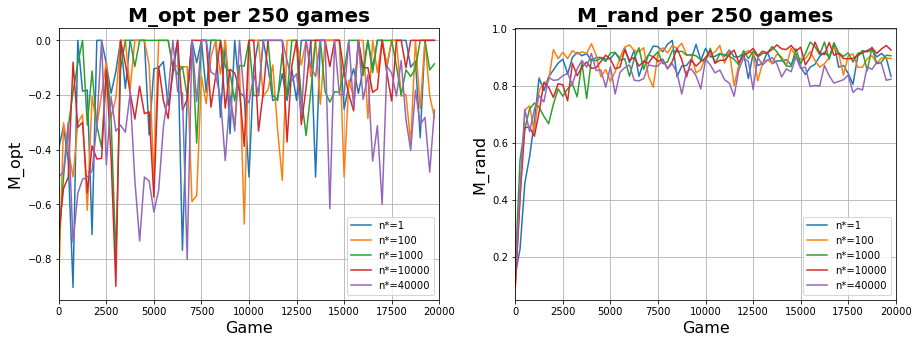

In [85]:
n_stars = [1, 100, 1000, 10000, 40000]
labels = [f"n*={n_star}" for n_star in n_stars]

plot_m_values(player_stats, labels=labels, save_path='artifacts/fig_Q13.pdf')

### Q14

In [86]:
ids = {
    'eps_0' : '1bnrau6x',
    'eps_001' : '3c44q08e',
    'eps_01' : '3bp4kou8',
    'eps_05' : '319phflx',
    'eps_1' : '2fb5hfvj',
}

player_stats = fetch_from_wandb(ids.values())

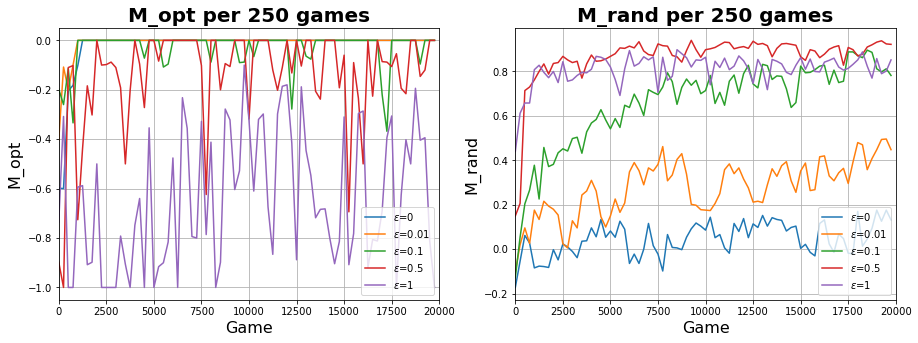

In [94]:
epsilons = [0, 0.01, 0.1, 0.5, 1]
labels = [f'$\epsilon$={eps}' for eps in epsilons]

plot_m_values(player_stats, labels=labels, save_path='artifacts/fig_Q14.pdf')

### Q16

In [98]:
ids = {
    #'eps_0001' : '3doioczx',
    'eps_001' : '25qa0gyh',
    'eps_01' : '3gdakz2m',
    'eps_02' : '2rn9dabu',
    #'eps_03' : '1zqbel4r',
    'eps_05' : '2mc8z1r6',
    #'eps_07' : '1ivstxqi',
}

player_stats = fetch_from_wandb(ids.values())

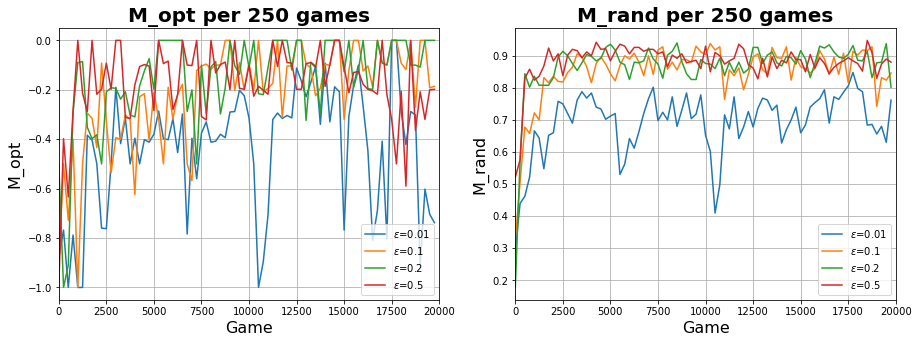

In [99]:
epsilons = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7]
epsilons = [0.01, 0.1, 0.2, 0.5]
labels = [f'$\epsilon$={eps}' for eps in epsilons]

plot_m_values(player_stats, labels=labels, save_path='artifacts/fig_Q16.pdf')

### Q17

In [107]:
ids = {
    'n_star_1' : '16e21b8f',
    #'n_star_50' : '393ub47o',
    #'n_star_100' : '3iynmqau',
    #'n_star_500' : '2wu4483h',
    'n_star_1000' : '9q725ef8',
    #'n_star_5000' : '33pod05t',
    'n_star_10000' : '2uzwlaxl',
    #'n_star_20000' : '11tc34u1',
    #'n_star_40000' : '3hcegbl3', 
}

player_stats = fetch_from_wandb(ids.values())

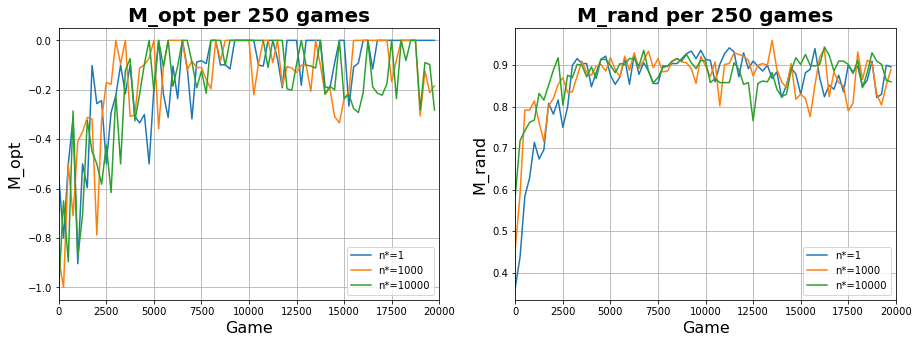

In [108]:
n_stars = [1, 1000, 10000]
labels = [f"n*={n_star}" for n_star in n_stars]

plot_m_values(player_stats, labels=labels, save_path='artifacts/fig_Q17.pdf')